In [70]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [71]:
from pathlib import Path as path
data_dir = path.cwd() / 'Dataset'

In [72]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/home/suleiman/Desktop/dev folder/deep learning/deep learning/Data_augumentation/Dataset/pressed/pressed_51.jpg'),
 PosixPath('/home/suleiman/Desktop/dev folder/deep learning/deep learning/Data_augumentation/Dataset/pressed/pressed_6.jpg'),
 PosixPath('/home/suleiman/Desktop/dev folder/deep learning/deep learning/Data_augumentation/Dataset/pressed/pressed_38.jpg'),
 PosixPath('/home/suleiman/Desktop/dev folder/deep learning/deep learning/Data_augumentation/Dataset/pressed/pressed_11.jpg'),
 PosixPath('/home/suleiman/Desktop/dev folder/deep learning/deep learning/Data_augumentation/Dataset/pressed/pressed_41.jpg')]

In [73]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

173


In [74]:
pressed = list(data_dir.glob('pressed/*'))
flawless = list(data_dir.glob('flawless/*'))
stained = list(data_dir.glob('stained/*'))

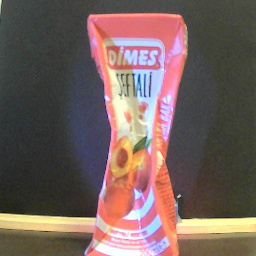

In [75]:
PIL.Image.open(str(pressed[1]))

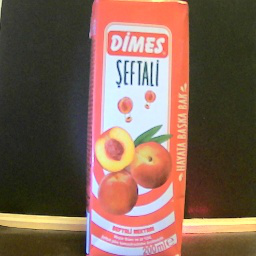

In [76]:
PIL.Image.open(str(flawless[1]))

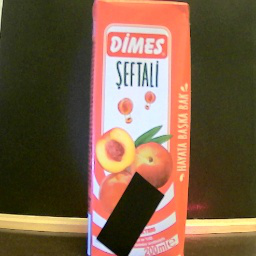

In [77]:
PIL.Image.open(str(stained[1]))

In [78]:
images_dict = {
    'flawless': list(data_dir.glob('flawless/*')),
    'stained' : list(data_dir.glob('stained/*')),
    'pressed' : list(data_dir.glob('pressed/*'))
    }

In [79]:
label_dict = {
    'flawless': 0,
    'stained' : 1,
    'pressed' : 2
    }

In [80]:
img = cv2.imread(str(images_dict['flawless'][0]))

In [81]:
img.shape

(256, 256, 3)

In [82]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

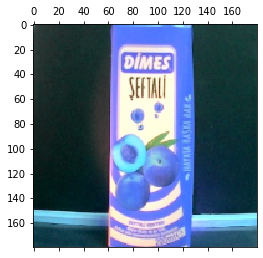

In [83]:
plt.matshow(cv2.resize(img,(180,180)))

In [84]:
X, y = [], []

for label, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(label_dict[label])

In [85]:
X = np.array(X)
y = np.array(y)

<h3 style='color:black'>Train test split</h3>

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:black'>Preprocessing: scale images</h3>

In [87]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:black'>Build convolutional neural network and train it</h3>

In [ ]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

In [90]:
model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 1s 112ms/step - loss: 1.0845 - accuracy: 0.4545


[1.0844708681106567, 0.4545454680919647]

In [93]:
predictions = model.predict(X_test_scaled)

In [94]:
score = tf.nn.softmax(predictions[0])

In [95]:
np.argmax(score)

0

In [96]:
y_test[0]

0

<h3 style='color:black'>Improve Test Accuracy Using Data Augmentation</h3>

In [112]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

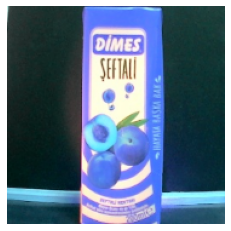

In [113]:
plt.axis('off')
plt.imshow(X[0])

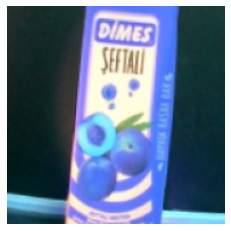

In [114]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:black'>Train the model using data augmentation and a drop out layer</h3>

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
5/5 [==============================] - 7s 928ms/step - loss: 1.3709 - accuracy: 0.2636
Epoch 2/10
5/5 [==============================] - 5s 879ms/step - loss: 1.1740 - accuracy: 0.4574
Epoch 3/10
5/5 [==============================] - 5s 873ms/step - loss: 1.0146 - accuracy: 0.5194
Epoch 4/10
5/5 [==============================] - 5s 931ms/step - loss: 0.9237 - accuracy: 0.5814
Epoch 5/10
5/5 [==============================] - 5s 871ms/step - loss: 0.8353 - accuracy: 0.7209
Epoch 6/10
5/5 [==============================] - 5s 860ms/step - loss: 0.7123 - accuracy: 0.7287
Epoch 7/10
2/5 [===========>..................] - ETA: 3s - loss: 0.7498 - accuracy: 0.6875

In [ ]:
model.evaluate(X_test_scaled,y_test)